# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Bagas Andihartono
- **Email:** bagasandihartono@gmail.com
- **ID Dicoding:** Bagas Andihartono

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan tingkat penyewaan sepeda setiap hari nya?
- Bagaimana tren peningkatan atau penurunan permintaan penyewaan sepeda dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
hour_df = pd.read_csv("data/hour.csv", delimiter=",")


In [7]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [10]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.isna().sum() #cek jumlah missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum()) #cek duplikat

Jumlah duplikasi:  0


In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [14]:
#mengubah tabel dteday menjadi date
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [18]:
hour_df['season'] = hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})


In [19]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
hour_df.to_csv("hour_modified.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [24]:
# jumlah order berdasarkan cuaca
hour_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False).reset_index().head(4)


,weathersit,instant
0,1,11413
1,2,4544
2,3,1419
3,4,3


## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5172\1591914638.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  penyewa_per_hari = hour_df.groupby('weekday')['cnt'].sum()


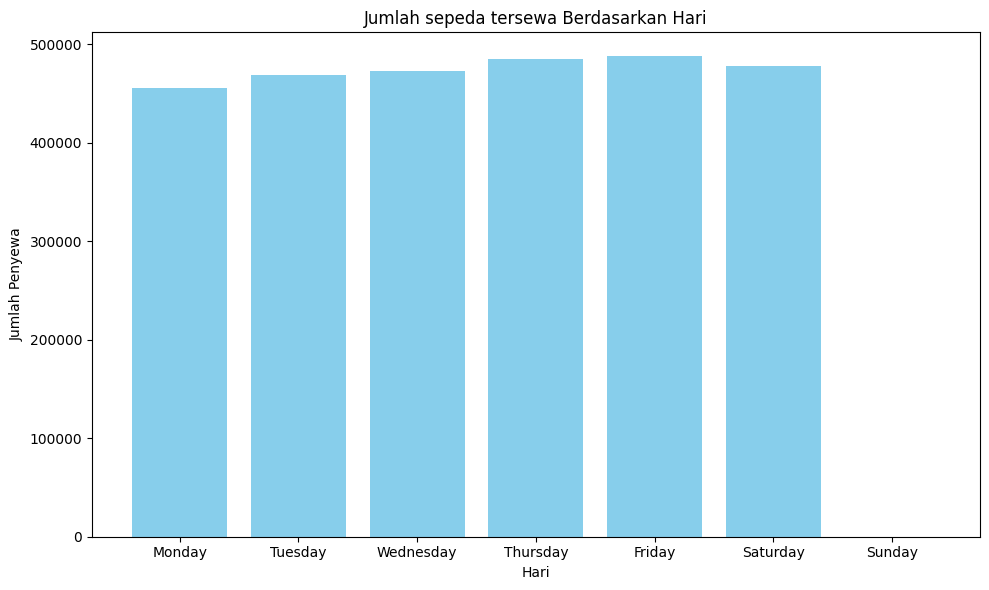

In [25]:
# Membuat kamus untuk mengganti nama hari menjadi bahasa Inggris
nama_hari = {
    0: 'sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# Mengubah nama hari dalam dataset
hour_df['weekday'] = hour_df['weekday'].replace(nama_hari)

# Mengubah tipe data kolom 'weekday' menjadi kategori dengan urutan yang benar
hari_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_df['weekday'] = pd.Categorical(hour_df['weekday'], categories=hari_order, ordered=True)


# Mengelompokkan data berdasarkan hari dan menjumlahkan jumlah penyewa
penyewa_per_hari = hour_df.groupby('weekday')['cnt'].sum()

# Menyiapkan data untuk plotting
hari = penyewa_per_hari.index
jumlah_penyewa = penyewa_per_hari.values

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(hari, jumlah_penyewa, color='skyblue')
plt.title('Jumlah sepeda tersewa Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewa')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

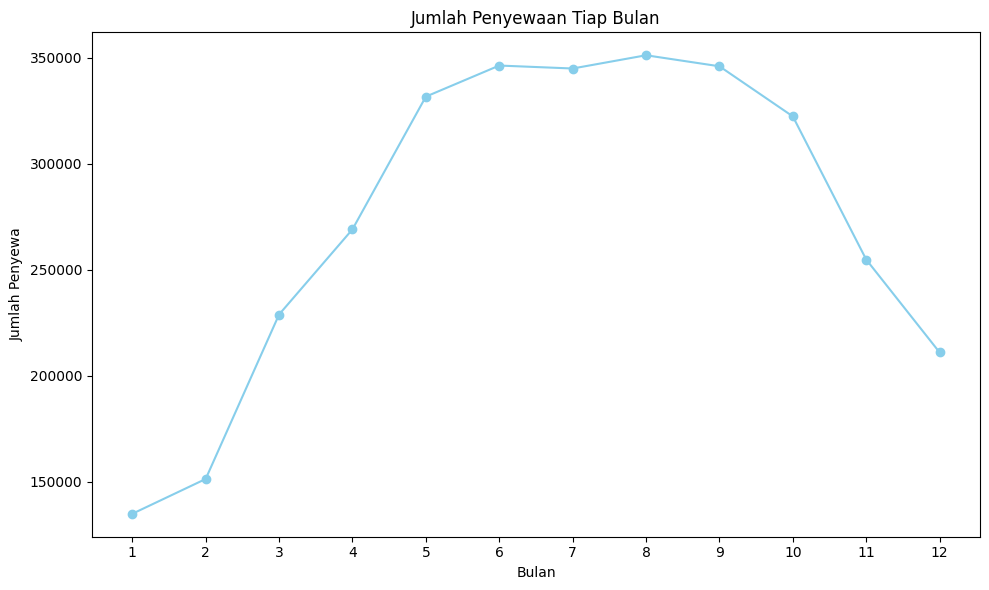

In [89]:
# Mengelompokkan data berdasarkan bulan dan menjumlahkan jumlah penyewa
penyewa_per_bulan = hour_df.groupby('mnth')['cnt'].sum()

# Menyiapkan data untuk plotting
bulan = penyewa_per_bulan.index
jumlah_penyewa = penyewa_per_bulan.values

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(bulan, jumlah_penyewa, marker='o', color='skyblue', linestyle='-')
plt.title('Jumlah Penyewaan Tiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa')
plt.xticks(bulan)  # Agar label bulan ditampilkan sesuai urutan bulan
plt.tight_layout()
plt.grid(False)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : permintaan penyewaan sepedah terbanyak berada pada hari sabtu
- Conclution pertanyaan 2 : trend permintaan terjadi peningkatan  pada bulan januari(1) hingga bulan juni(6),dan strend stabil hingga bulan september(9) karena pada rentan waktu berikut adalah masa masa libur sekolah dan kuliah sehingga permintaan tetap setabil dan tinggi.dan trend mulai menurun hingga bulan desember(12)